## RANDOM FOREST USING BOSTON DATASET
An excellent explanation is provided in this youtube video https://www.youtube.com/watch?v=loNcrMjYh64
  * The key method is that it using 'bagging', i.e., the sample selection of samples to construct many decision trees.
  * Then prediction is based on the highest 'votes' that from all the decision trees

In [160]:
import pandas as pd
import numpy as py
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
import sklearn.metrics

In [161]:
# lets learn about more about the dataset
print boston['DESCR']

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [162]:
boston = load_boston()
# the boston dataset consists of two arrays: features (.data) & target (.target)
# lets add the feature into a dataframe
df=pd.DataFrame(boston.data, columns=boston.feature_names)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [163]:
# now add the target to the feature dataframe
df['PRICE']=pd.DataFrame(boston.target)
df['PRICE'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

In [164]:
# rename housing price into 3 categories: cheap, medium, expensive
# this is based the 25, 50, 75 percentiles
def price(x):
    if x < 17:
        return 'cheap'
    elif x < 25:
        return 'medium'
    else:
        return 'expensive'

df['PRICE_CAT'] = df['PRICE'].apply(price)
df.head(3)

# Or alternatively, it is much easier to use a quartile cut
# df['priceCAT2'] = pd.qcut(df['PRICE'], 3, labels=['cheap','medium','expensive'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PRICE_CAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,medium
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,medium
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,expensive


In [165]:
# time to split the dataframes into training & test
feature = df[df.columns[:-2]]
target = df['PRICE_CAT']
feature.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [126]:
# now to randomly assign training and testing dataframes
# 80% will be for training, 20% will be for testing
train_feature, test_feature, train_target, test_target = train_test_split(feature, target, test_size=.2)

print train_feature.shape
print test_feature.shape

(404, 13)
(102, 13)


### PREPARE THE CLASSIFIER

In [127]:
# use 100 decision trees
clf = RandomForestClassifier(n_estimators=100)
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### FIT THE MODEL

In [128]:
model = clf.fit(train_feature, train_target)
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### TEST THE MODEL

In [129]:
predictions = model.predict(test_feature)

### SCORE THE MODEL

In [140]:
# check how many % the model is accurate
print 'accuracy', '\n', sklearn.metrics.accuracy_score(test_target, predictions)*100, '%', '\n'
print 'confusion matrix', '\n', sklearn.metrics.confusion_matrix(test_target,predictions)

accuracy 
82.3529411765 % 

confusion matrix 
[[21  0  3]
 [ 0 21  4]
 [ 8  3 42]]


In [156]:
# rank the importance of features
df2= pd.DataFrame(model.feature_importances_, index=df.columns[:-2])
df2.sort_values(by=0,ascending=False)

# RM: average number of rooms, status of people living in the area, and crime rate are the 3 top factors 
# determining the housing price

,0
RM,0.225612
LSTAT,0.192478
CRIM,0.108510
DIS,0.088056
AGE,0.074202
NOX,0.067718
B,0.057706
PTRATIO,0.051702
TAX,0.047568
INDUS,0.037871


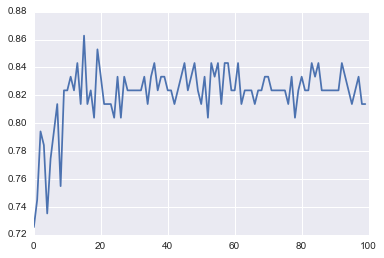

In [167]:
# see how many decision trees are minimally required make the accuarcy consistent

import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline


trees=range(100)
accuracy=np.zeros(100)

for i in range(len(trees)):
   clf=RandomForestClassifier(n_estimators= i+1)
   model=clf.fit(train_feature, train_target)
   predictions=model.predict(test_feature)
   accuracy[i]=sklearn.metrics.accuracy_score(test_target, predictions)

plt.plot(trees,accuracy)

# well, seems like more than 10 trees will have a consistent accuracy of 0.82.
# Guess there's no need to have an ensemble of 100 trees!